# Exercises part II: branching process

The code below extract the probability distribution for the number of nodes at a few time points for a branching process with a Poisson offspring distribution.

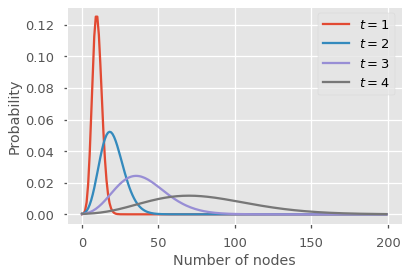

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-talk'])

R = 2.
Q = lambda x: np.exp(R*(x-1))
G0 = lambda x: x**5
N = 200
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)

tset = {1,2,3,4}
x = c.copy()
for t in range(max(tset)+1):
    if t in tset:
        pn = abs(np.fft.fft(G0(x))/N)
        plt.plot(n,pn, label=fr"$t = {t}$")
    x = Q(x)
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of nodes')
plt.show()

:::{tip}
Remember to adapt the support to avoid aliasing effects.
:::

## Posterior distribution on the reproduction number

Let us assume that we have an emerging outbreak. To simplify the situation, let us assume that the generation time is always a week, and infectious individuals generate a number of secondary case according to a Poisson distribution with PGF of the form

$$
\begin{align}
Q(x) = e^{R(x-1)}\;.
\end{align}
$$

We can model this situation using a branching process, and we want to infer $R$, the reproduction number.

1. Run the code below to get a time series---this will represent the data available.

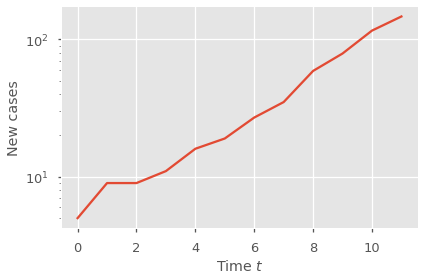

In [5]:
from secret_code import *
T = 12 #length of the time series
t = np.arange(T)
n = poisson_branching_process(T)

plt.semilogy(t,n)
plt.xlabel(r"Time $t$")
plt.ylabel(r"New cases")
plt.show()

2. Reusing the code above for the PGF, estimate the posterior distribution on $R$.

:::{tip}
As a first step, use only the first and last data points, $n_0 = 1$ and $n_T$. You have that $G_0(x) = x^{n_0}$, and you can calculate $G_T(x)$ (and the associated probability distribution) from the recursion implemented in the code above.

The posterior distribution is $P(R|n_0,n_T) \propto P(n_T| n_0, R) P(n_0,R)$.
We could choose different prior distribution, but right now let us use $P(n_0,R) = \mathrm{cte}$.

Since the likelihood $P(n_T| n_0, R)$ is generated by $G_T(x)$, we can evaluate the posterior distribution for a few values of $R$ on an interval and plot the resulting curve.
:::


3. To make it a bit more realistic, apply your code to the following time series, where only a certain fraction of the cases are detected.

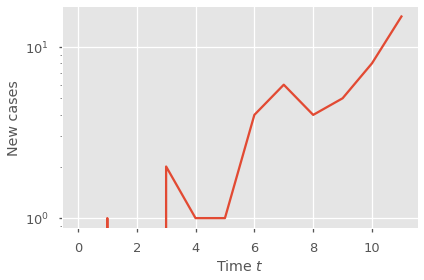

In [3]:
from secret_code import *
T = 12 #length of the time series
t = np.arange(T)
n = poisson_branching_process_with_noise(T)

plt.semilogy(t,n)
plt.xlabel(r"Time $t$")
plt.ylabel(r"New cases")
plt.show()

4. Try using more data points and breaking down the likelihood in a product (see below). Is the inference better?

$$
\begin{align}
\prod_{j=1}^{T/\tau} P\left(n_{j\tau}|n_{(j-1)\tau}, R\right) \;.
\end{align}
$$

:::{note}
In the limit $\tau = 1$, one could argue (successfully) that PGFs are not necessary here. Indeed, $P(n_{t}|n_{t-1},R)$ is a Poisson distribution by the additive property of Poisson random variables. While this is true in this very simple exercise, realistic situations will lead to a much more complex likelihood which either require PGFs, or an approximation scheme making use of simulation like [approximate Bayesian computation (ABC)](https://en.wikipedia.org/wiki/Approximate_Bayesian_computation).
:::